In [1]:
!pip install keras
!pip install tensorflow
!pip install scipy
!pip3 install opencv-python
!pip install pypng
!pip install matplotlib
!pip install imutils

from imutils.perspective import four_point_transform
from imutils import contours
import imutils


import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy import ndimage
import os


In [2]:
# Isolate Digits

def is_overlapping_horizontally(box1, box2):
    x1, _, w1, _ = box1
    x2, _, _, _ = box2
    if x1 > x2:
        return is_overlapping_horizontally(box2, box1)
    return (x2 - x1) < w1

def merge(box1, box2):
    assert is_overlapping_horizontally(box1, box2)
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    x = min(x1, x2)
    w = max(x1 + w1, x2 + w2) - x
    y = min(y1, y2)
    h = max(y1 + h1, y2 + h2) - y
    return (x, y, w, h)

def windows(contours):
    """return List[Tuple[x: Int, y: Int, w: Int, h: Int]]"""
    boxes = []
    for cont in contours:
        box = cv2.boundingRect(cont)
        if not boxes:
            boxes.append(box)
        else:
            if is_overlapping_horizontally(boxes[-1], box):
                last_box = boxes.pop()
                merged_box = merge(box, last_box)
                boxes.append(merged_box)
            else:
                boxes.append(box)
    return boxes

def preprocess(filename):
    image = cv2.imread(filename)
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)

    
    # Get Contours

    contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours_dict = dict()
    for cont in contours:
        x, y, w, h = cv2.boundingRect(cont)
        area = cv2.contourArea(cont)
        if 25 < area and 25 < w and h > 15:
            contours_dict[(x, y, w, h)] = cont

    contours_filtered = sorted(contours_dict.values(), key=cv2.boundingRect)

    blank_background = np.zeros_like(edges)
    img_contours = cv2.drawContours(blank_background, contours_filtered, -1, (255,255,255), thickness=2)

    
    
    
    
    
    
def plot_boxes(contours_filtered, image):
    
    boxes = windows(contours_filtered)

    img2 = image.copy()
    for box in boxes:
        x, y, w, h = box
        img2 = cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    plt.imshow(img2)




In [12]:
num_digits = 1

folder = '/Users/eylul/Documents/MATLAB/renkli-outputs/'
folder2 = '/Users/eylul/Desktop/ocr-trainset'

directory = r'C:\Users\eylul\Desktop\ocr-trainset'
dir2 = r'C:\Users\eylul\Documents\MATLAB\renkli-outputs'


1.JPG
/Users/eylul/Desktop/ocr-trainset\1.JPG
10.jpg
/Users/eylul/Desktop/ocr-trainset\10.jpg
100.jpg
/Users/eylul/Desktop/ocr-trainset\100.jpg
101.JPG
/Users/eylul/Desktop/ocr-trainset\101.JPG
102.jpg
/Users/eylul/Desktop/ocr-trainset\102.jpg
103.jpg
/Users/eylul/Desktop/ocr-trainset\103.jpg
104.jpg
/Users/eylul/Desktop/ocr-trainset\104.jpg
105.jpg
/Users/eylul/Desktop/ocr-trainset\105.jpg
106.jpg
/Users/eylul/Desktop/ocr-trainset\106.jpg
107.jpg
/Users/eylul/Desktop/ocr-trainset\107.jpg
109.JPG
/Users/eylul/Desktop/ocr-trainset\109.JPG
11.jpg
/Users/eylul/Desktop/ocr-trainset\11.jpg
111.jpg
/Users/eylul/Desktop/ocr-trainset\111.jpg
112.JPG
/Users/eylul/Desktop/ocr-trainset\112.JPG
114.jpg
/Users/eylul/Desktop/ocr-trainset\114.jpg
115.JPG
/Users/eylul/Desktop/ocr-trainset\115.JPG
117.JPG
/Users/eylul/Desktop/ocr-trainset\117.JPG
12.jpg
/Users/eylul/Desktop/ocr-trainset\12.jpg
124.JPG
/Users/eylul/Desktop/ocr-trainset\124.JPG
125.JPG
/Users/eylul/Desktop/ocr-trainset\125.JPG
127.jpg
/U

389.jpg
/Users/eylul/Desktop/ocr-trainset\389.jpg
39.JPG
/Users/eylul/Desktop/ocr-trainset\39.JPG
390.JPG
/Users/eylul/Desktop/ocr-trainset\390.JPG
391.jpg
/Users/eylul/Desktop/ocr-trainset\391.jpg
4.jpg
/Users/eylul/Desktop/ocr-trainset\4.jpg
40.jpg
/Users/eylul/Desktop/ocr-trainset\40.jpg
409.jpg
/Users/eylul/Desktop/ocr-trainset\409.jpg
41.jpg
/Users/eylul/Desktop/ocr-trainset\41.jpg
417.jpg
/Users/eylul/Desktop/ocr-trainset\417.jpg
42.jpg
/Users/eylul/Desktop/ocr-trainset\42.jpg
421.jpg
/Users/eylul/Desktop/ocr-trainset\421.jpg
425.jpg
/Users/eylul/Desktop/ocr-trainset\425.jpg
43.JPG
/Users/eylul/Desktop/ocr-trainset\43.JPG
430.jpg
/Users/eylul/Desktop/ocr-trainset\430.jpg
434.jpg
/Users/eylul/Desktop/ocr-trainset\434.jpg
439.jpg
/Users/eylul/Desktop/ocr-trainset\439.jpg
44.jpg
/Users/eylul/Desktop/ocr-trainset\44.jpg
440.jpg
/Users/eylul/Desktop/ocr-trainset\440.jpg
448.jpg
/Users/eylul/Desktop/ocr-trainset\448.jpg
45.JPG
/Users/eylul/Desktop/ocr-trainset\45.JPG
46.JPG
/Users/eylu

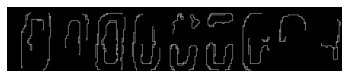

In [13]:
#image = cv2.imread('/Users/eylul/Documents/MATLAB/renkli-outputs/1.jpg')

for filename in os.listdir(directory):
    
    print(filename)
    # Get image name, load image
    image_path= os.path.join(folder2, filename)
    #imgname = folder + str(i) + '.jpg'
    image = cv2.imread(image_path)
    
    print(image_path)
    #print(i)
    
    plt.imshow(image)
    image = imutils.resize(image, height=500)

    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)




    edges = cv2.Canny(image, 40, 250 , apertureSize=3, L2gradient=True)

    contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours_dict = dict()
    for cont in contours:
        x, y, w, h = cv2.boundingRect(cont)
        area = cv2.contourArea(cont)
        if 15 < area and 15 < w and h > 25:
            contours_dict[(x, y, w, h)] = cont

    contours_filtered = sorted(contours_dict.values(), key=cv2.boundingRect)

    blank_background = np.zeros_like(edges)
    img_contours = cv2.drawContours(blank_background, contours_filtered, -1, (255,255,255), thickness=2)

    plt.imshow(img_contours, 'gray')

    boxes = windows(contours_filtered)
    box_len = len(boxes)

    for n in range(box_len):
        x, y, w, h = boxes[n]
        plt.axis('off')

        if y < 20:
            y = 20
        if x < 20:
            x = 20
            
        roi = image[y-20:y+h+10, x-20:x+w+10]
        # original digit size -> not convertible to 32,32

        #roi = cv2.resize(roi,(32,32),interpolation = cv2.INTER_AREA)
        # cubic, linear ve area dan daha kaliteli resimler çıkarır.
        # linear ve cubic in amacı küçük olan resmi daha da büyütmek.
        a = str(num_digits)
        num_digits +=1
        #a = str(n+1)
        cv2.imwrite('/Users/eylul/Desktop/Post-PoC/ocr-trainset-digits/basamak'+a+'.png', roi)



